# Flow-induced dynamic instability
## Coupled-mode flutter of an airfoil

We want to model the dynamics of a wing moving in plunge mode and torsion mode. Consider a case with fuid flow  $ U$, such that  $ U_r >> 1$. The fluid forces are assumed acting on a wing section that has instantenous position defined by $\theta$ and $y$. The lift force is defined as: $F =\frac{1}{2}\rho U^2 L C_L$. Applying Newton's second law gives:  
### $\Sigma F_y$,       $m(\ddot y - \ddot\theta l_m) = -k_y y + \frac{1}{2}\rho U^2 L C_L$ ,where $C_L = a\theta$  
### $\Sigma M$,       $I\ddot\theta = -k_\theta \theta -k_y y l_m  + \frac{1}{2}\rho U^2 L (l_e + l_m) C_L$  
  
## Dimensionless quantities:
### $\tau = + \sqrt{\frac{k_\theta}{I}}$, $\Omega =\sqrt{\frac{k_y / m}{k_\theta/I}} $, $\bar{Y} = \frac{y}{L}$, $\bar{K}=\frac{k_y L}{k_\theta}$,$C_Y = \frac{\rho U^2 L^2}{2 k_\theta}$  
  
$\therefore$ The non-dimensional coupled equations in flow:  

### $ \ddot{\bar{Y}} + \Omega^2 \bar{Y}= \frac{l_m}{L} \ddot \Theta + \frac{\Omega^2 C_Y a}{\bar{K}} \Theta$  
### $ \ddot \Theta + ( 1 - a C_Y \frac{l_m+l_e}{L})\Theta = - \bar{K} \frac{l_m}{L} \bar{Y} $  
  
In a matrix form:  
\begin{equation*}
\begin{bmatrix}
1 & -\frac{l_m}{L} \\
0 & 1 
\end{bmatrix}
=
\begin{Bmatrix} 
\ddot{\bar{Y}}\\ 
\ddot \Theta 
\end{Bmatrix}
\end{equation*}





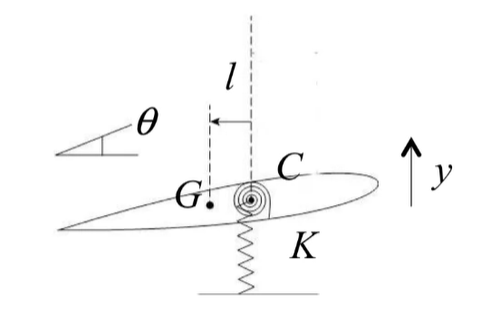

In [21]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/lm2-poly/FSI/main/Chapitre_4/Capture.PNG')

In [15]:
# =============================================================================
# Define libraries used
# =============================================================================

import numpy as np 
import matplotlib.pyplot as plt
from sympy import solve
from sympy import Symbol                   # To solve the determinents as a function of natural frequency
import math
from sympy import MutableDenseMatrix

In [16]:
# =============================================================================
# Define system parameters
# =============================================================================
Omega = math.sqrt(0.5)   
lm    = 0.25
le    = 0.25
l     = 1.0
K     = 1.0
a     = 2*math.pi 
w = Symbol('w')                 # natural frequency
CY  = np.linspace(0.,0.2,40)
rrt = np.zeros((len(CY),4))     # 2D array for the real part of the frequencies for each CY value
rrI = np.zeros((len(CY),4))     # 2D array for the Imaginary part of the frequencies for each CY value

In [17]:
# =============================================================================`
# Finding the eigenvalues (natural frequencies) of the system
# =============================================================================

for z in range(len(CY)):       # A loop to evaluate the determinents and solve for the natural frequencies
    Matrix = MutableDenseMatrix([[Omega**2-w**2,(-Omega**2*CY[z]*a)/K+(w**2*lm/l)],[K*lm/l,1-w**2-(a*CY[z]*(lm+le)/l)]])
    Det = Matrix.det()         # Determinent of the system for each CY
    roots = solve(Det,w)       # Natural frequencies of the system for each CY
    
    for i in range(len(roots)): # A loop to list the real and imaginary parts of the evaluated frequencies
        values = complex(np.array(roots)[i])
        rrt[z,i] = values.real
        rrI[z,i] = values.imag

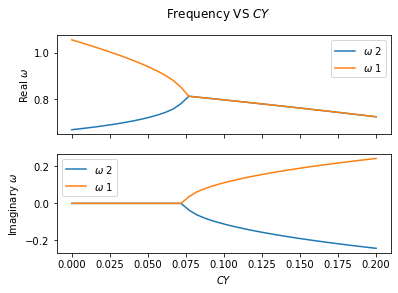

In [18]:
# =============================================================================
# Plotting
# =============================================================================
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(r'Frequency VS $CY$')
ax1.plot(CY,rrt[:,2],CY,rrt[:,3])
ax2.plot(CY,rrI[:,2],CY,rrI[:,3])
plt.xlabel(r'$CY$')
ax1.set_ylabel('Real'' ''$\omega$')
ax2.set_ylabel('Imaginary'' ''$\omega$')
ax1.legend([r"$\omega$ 2",'$\omega$ 1'])
ax2.legend([r"$\omega$ 2",'$\omega$ 1'])
plt.show()
